## Vanilla PINN

In [2]:
# from importlib import reload
# import matplotlib.pyplot as plt

# from ptycho import params as p



# # reload(train.model)
# # reload(train)

# print(p.cfg)
# from ptycho.initialize_data import *
# from ptycho.train import *

# mae(trim(reassemble(b)[0]), trim(YY_ground_truth)) # PINN, no overlap, 30 epochs, MAE

In [1]:
from ptycho import params as p
p.cfg['gridsize'] = 1

p.cfg['offset'] = 4
p.cfg['max_position_jitter'] = 10
p.cfg['nepochs'] = 60
p.cfg['output_prefix'] = 'tmp'
p.cfg['sim_jitter_scale'] = 0.
p.cfg['positions.provided'] = False
p.cfg['object.big'] = True
p.cfg['intensity_scale.trainable'] = True

p.cfg['data_source'] = 'grf'

p.cfg['gridsize'] = 1
p.cfg['nll_weight'] = 0.
p.cfg['mae_weight'] = 1.


from ptycho import initialize_data as init

/home/ollie/anaconda3/envs/tf/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-04-11 15:50:51.259985: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-11 15:50:51.356078: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-11 15:50:51.713359: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared o

simulating gaussian position jitter, scale 0.0
Sampling on regular grid
input shape (None, 64, 64, 1)
Instructions for updating:
Please pass an integer value for `reinterpreted_batch_ndims`. The current behavior corresponds to `reinterpreted_batch_ndims=tf.size(distribution.batch_shape_tensor()) - 1`.
simulating gaussian position jitter, scale 0.0
Sampling on regular grid
1.0000068
nphoton 8.998918


### Set training set to GRF, test set to lines:

In [4]:
Xtrain = init.X_train
Ytrain = (init.Y_I_train, init.Y_phi_train)
YY_I_test_full = init.YY_I_test_full

from importlib import reload
from ptycho import initialize_data as init

p.cfg['data_source'] = 'lines'
reload(init)

init.X_train = Xtrain
init.Y_I_train, init.Y_phi_train = Ytrain
init.YY_I_test_full = YY_I_test_full

simulating gaussian position jitter, scale 0.0
Sampling on regular grid
simulating gaussian position jitter, scale 0.0
Sampling on regular grid
1.0000222
nphoton 8.969574


In [5]:
from ptycho import train

offset 4
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 intensity_scaler (IntensitySca  (None, 64, 64, 1)   1           ['input[0][0]']                  
 ler)                                                                                             
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 64)   640         ['intensity_scaler[0][0]']       
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 64, 64)   36928       ['conv2d[0][0]']  

                                                                                                  
 distribution_lambda (Distribut  ((None, 64, 64, 1),  0          ['intensity_scaler_inv[0][0]']   
 ionLambda)                      (None, 64, 64, 1))                                               
                                                                                                  
Total params: 4,396,227
Trainable params: 4,392,131
Non-trainable params: 4,096
__________________________________________________________________________________________________
None
using nominal scan positions for training


2023-04-11 15:52:54.977454: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-04-11 15:52:54.977471: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-04-11 15:52:54.977492: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1664] Profiler found 1 GPUs
2023-04-11 15:52:54.977794: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcupti.so.11.2'; dlerror: libcupti.so.11.2: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/ollie/anaconda3/envs/tf/lib/:/home/ollie/anaconda3/envs/tf/lib/
2023-04-11 15:52:55.025475: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-04-11 15:52:55.025541: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1798] CUPTI activity buffer flushed


Epoch 1/60


2023-04-11 15:52:57.879590: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-04-11 15:52:58.975500: I tensorflow/core/util/cuda_solvers.cc:179] Creating GpuSolver handles for stream 0x870cb60


732/732 [==============================] - 12s 12ms/step - loss: 12.4973 - trimmed_obj_loss: 0.2172 - intensity_scaler_inv_loss: 12.4973 - distribution_lambda_loss: 13981679.0000 - probe_illumination_loss: 0.0240 - val_loss: 11.3613 - val_trimmed_obj_loss: 0.2359 - val_intensity_scaler_inv_loss: 11.3613 - val_distribution_lambda_loss: 9100086.0000 - val_probe_illumination_loss: 0.0239 - lr: 0.0010
Epoch 2/60
732/732 [==============================] - 8s 11ms/step - loss: 9.2948 - trimmed_obj_loss: 0.2318 - intensity_scaler_inv_loss: 9.2948 - distribution_lambda_loss: 5774341.0000 - probe_illumination_loss: 0.0240 - val_loss: 7.2507 - val_trimmed_obj_loss: 0.2304 - val_intensity_scaler_inv_loss: 7.2507 - val_distribution_lambda_loss: 3129652.7500 - val_probe_illumination_loss: 0.0239 - lr: 0.0010
Epoch 3/60
732/732 [==============================] - 8s 11ms/step - loss: 6.4350 - trimmed_obj_loss: 0.2301 - intensity_scaler_inv_loss: 6.4350 - distribution_lambda_loss: 2506595.5000 - probe

Epoch 21/60
732/732 [==============================] - 8s 11ms/step - loss: 2.4080 - trimmed_obj_loss: 0.1933 - intensity_scaler_inv_loss: 2.4080 - distribution_lambda_loss: 368071.8750 - probe_illumination_loss: 0.0240 - val_loss: 2.4629 - val_trimmed_obj_loss: 0.1943 - val_intensity_scaler_inv_loss: 2.4629 - val_distribution_lambda_loss: 393148.5938 - val_probe_illumination_loss: 0.0239 - lr: 5.0000e-04
Epoch 22/60
732/732 [==============================] - 8s 12ms/step - loss: 2.3714 - trimmed_obj_loss: 0.1956 - intensity_scaler_inv_loss: 2.3714 - distribution_lambda_loss: 355085.7500 - probe_illumination_loss: 0.0240 - val_loss: 2.4614 - val_trimmed_obj_loss: 0.1978 - val_intensity_scaler_inv_loss: 2.4614 - val_distribution_lambda_loss: 375898.7812 - val_probe_illumination_loss: 0.0239 - lr: 5.0000e-04
Epoch 23/60
732/732 [==============================] - 8s 11ms/step - loss: 2.3421 - trimmed_obj_loss: 0.1976 - intensity_scaler_inv_loss: 2.3421 - distribution_lambda_loss: 342624.3

Epoch 40/60
732/732 [==============================] - 8s 11ms/step - loss: 1.8001 - trimmed_obj_loss: 0.2219 - intensity_scaler_inv_loss: 1.8001 - distribution_lambda_loss: 216564.6719 - probe_illumination_loss: 0.0240 - val_loss: 1.8675 - val_trimmed_obj_loss: 0.2218 - val_intensity_scaler_inv_loss: 1.8675 - val_distribution_lambda_loss: 228255.9688 - val_probe_illumination_loss: 0.0239 - lr: 1.2500e-04
Epoch 41/60
731/732 [============================>.] - ETA: 0s - loss: 1.7948 - trimmed_obj_loss: 0.2226 - intensity_scaler_inv_loss: 1.7948 - distribution_lambda_loss: 214729.1875 - probe_illumination_loss: 0.0240
Epoch 41: ReduceLROnPlateau reducing learning rate to 0.0001.
732/732 [==============================] - 8s 11ms/step - loss: 1.7947 - trimmed_obj_loss: 0.2226 - intensity_scaler_inv_loss: 1.7947 - distribution_lambda_loss: 214716.9844 - probe_illumination_loss: 0.0240 - val_loss: 1.8633 - val_trimmed_obj_loss: 0.2232 - val_intensity_scaler_inv_loss: 1.8633 - val_distributi

In [6]:
from ptycho.train import *

In [7]:
p.cfg['gridsize']

1

## Full PINN model, best params:

In [11]:
(size - bigN) // (bigoffset // 2) + 1

37

In [4]:
from ptycho import params as p
p.cfg['offset'] = 4
p.cfg['max_position_jitter'] = 10
p.cfg['nepochs'] = 60
p.cfg['output_prefix'] = 'tmp'
p.cfg['sim_jitter_scale'] = 0.
p.cfg['positions.provided'] = False

p.cfg['gridsize'] = 2
p.cfg['n_filters_scale'] = 2
p.cfg['object.big'] = True
p.cfg['intensity_scale.trainable'] = True
p.cfg['data_source'] = 'grf'

from ptycho import train, model
reload(model)
reload(train)

# print(p.cfg)
from ptycho.train import *

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 64, 64, 4)]  0           []                               
                                                                                                  
 intensity_scaler (IntensitySca  (None, 64, 64, 4)   1           ['input[0][0]']                  
 ler)                                                                                             
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 64)   2368        ['intensity_scaler[0][0]']       
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 64, 64)   36928       ['conv2d[0][0]']           

                                                                                                  
 distribution_lambda (Distribut  ((None, 64, 64, 4),  0          ['intensity_scaler_inv[0][0]']   
 ionLambda)                      (None, 64, 64, 4))                                               
                                                                                                  
Total params: 4,401,414
Trainable params: 4,397,318
Non-trainable params: 4,096
__________________________________________________________________________________________________
None
offset 4


2023-04-02 23:17:05.880817: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-04-02 23:17:05.880830: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.


using nominal scan positions for training


2023-04-02 23:17:06.200114: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-04-02 23:17:06.200215: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1798] CUPTI activity buffer flushed


Epoch 1/60
732/732 [==============================] - 11s 14ms/step - loss: 65660304.0000 - trimmed_obj_loss: 0.1470 - intensity_scaler_inv_loss: 14.1882 - distribution_lambda_loss: 65660304.0000 - probe_illumination_loss: 0.0254 - val_loss: 52689160.0000 - val_trimmed_obj_loss: 0.1493 - val_intensity_scaler_inv_loss: 13.5122 - val_distribution_lambda_loss: 52689160.0000 - val_probe_illumination_loss: 0.0253 - lr: 0.0010
Epoch 2/60
732/732 [==============================] - 10s 13ms/step - loss: 42612808.0000 - trimmed_obj_loss: 0.1468 - intensity_scaler_inv_loss: 12.9365 - distribution_lambda_loss: 42612808.0000 - probe_illumination_loss: 0.0254 - val_loss: 33659768.0000 - val_trimmed_obj_loss: 0.1446 - val_intensity_scaler_inv_loss: 12.1501 - val_distribution_lambda_loss: 33659768.0000 - val_probe_illumination_loss: 0.0253 - lr: 0.0010
Epoch 3/60
732/732 [==============================] - 10s 13ms/step - loss: 26034486.0000 - trimmed_obj_loss: 0.1435 - intensity_scaler_inv_loss: 11.2

Epoch 20/60
729/732 [============================>.] - ETA: 0s - loss: 972701.5625 - trimmed_obj_loss: 0.1427 - intensity_scaler_inv_loss: 2.9440 - distribution_lambda_loss: 972701.5625 - probe_illumination_loss: 0.0254
Epoch 20: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
732/732 [==============================] - 10s 13ms/step - loss: 971896.1875 - trimmed_obj_loss: 0.1427 - intensity_scaler_inv_loss: 2.9434 - distribution_lambda_loss: 971896.1875 - probe_illumination_loss: 0.0254 - val_loss: 873863.8750 - val_trimmed_obj_loss: 0.1435 - val_intensity_scaler_inv_loss: 2.8903 - val_distribution_lambda_loss: 873863.8750 - val_probe_illumination_loss: 0.0253 - lr: 5.0000e-04
Epoch 21/60
732/732 [==============================] - 10s 13ms/step - loss: 456604.8750 - trimmed_obj_loss: 0.1438 - intensity_scaler_inv_loss: 2.2721 - distribution_lambda_loss: 456604.8750 - probe_illumination_loss: 0.0254 - val_loss: 444718.7188 - val_trimmed_obj_loss: 0.1443 - val_intensit

In [8]:
mae(trim(reassemble(b)[0]), trim(YY_ground_truth)) # PINN

mean scale adjustment: 4.0062268213213885


0.2674870698454519

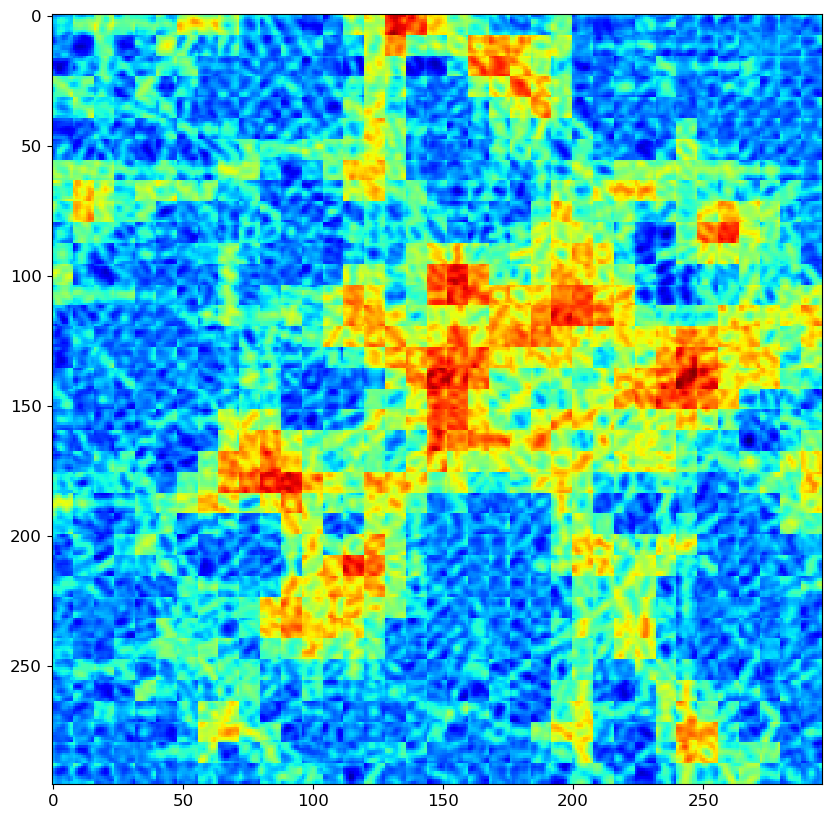

In [10]:
plt.rcParams["figure.figsize"] = (10, 10)
 
import matplotlib.pyplot as plt
plt.imshow(stitched[0], cmap = 'jet', interpolation='none')

In [12]:
mae(trim(reassemble(b)[0]), trim(YY_ground_truth)) # PINN

mean scale adjustment: 2.8131459


0.18101862

In [6]:
mae(trim(reassemble(b)[0]), trim(YY_ground_truth)) # PINN

mean scale adjustment: 0.7886175651136923


0.0015824206234714164

In [7]:
mae(trim(reassemble(b)[0]), trim(YY_ground_truth)) # PINN

mean scale adjustment: 0.7886175651136923


0.0015824206234714164

In [19]:
stitched[0].max()

3.0211456

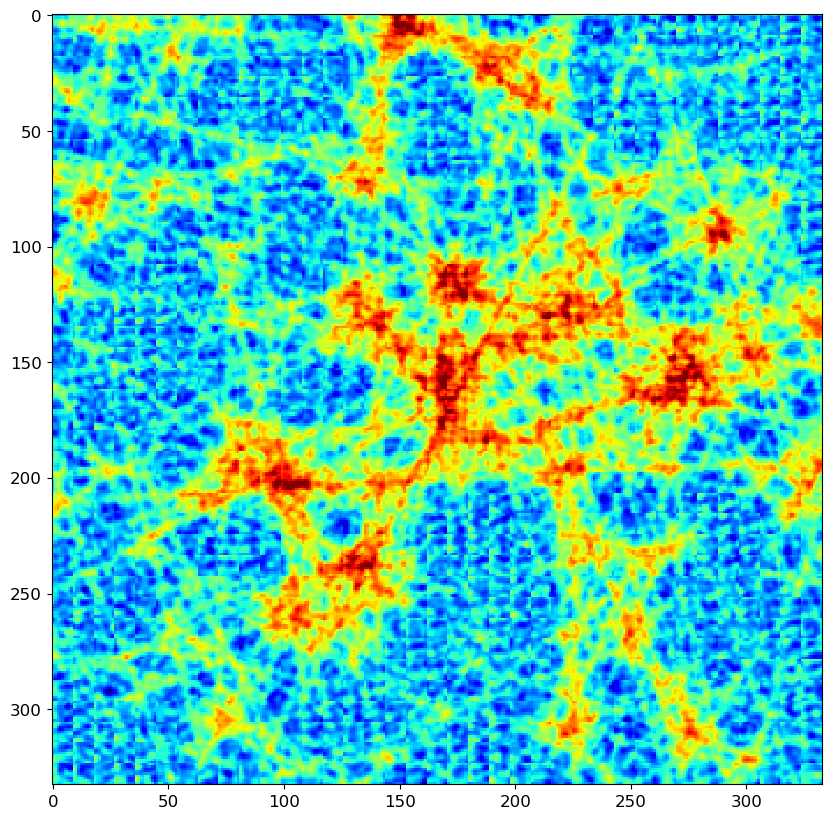

In [30]:
plt.rcParams["figure.figsize"] = (10, 10)
 
import matplotlib.pyplot as plt
plt.imshow(stitched[0], cmap = 'jet', interpolation='none', vmax = 2.7)

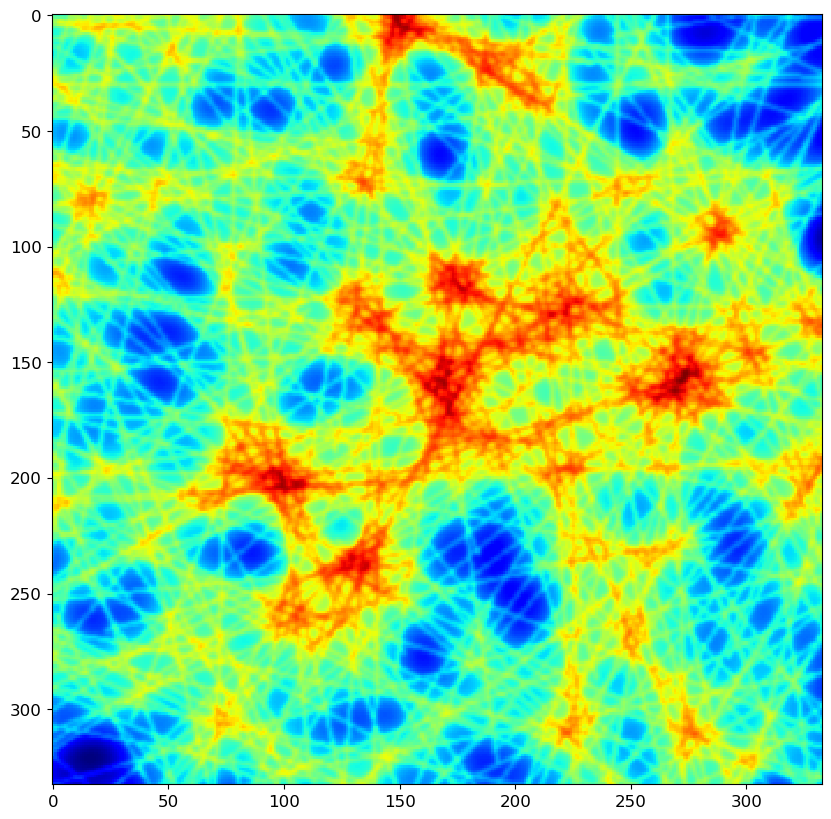

In [16]:
vmin = np.min(YY_I_test_full[0, clipleft: -clipright, clipleft: -clipright])
vmax = np.max(YY_I_test_full[0, clipleft: -clipright, clipleft: -clipright])
plt.imshow(YY_ground_truth, interpolation = 'none',
          cmap = 'jet')

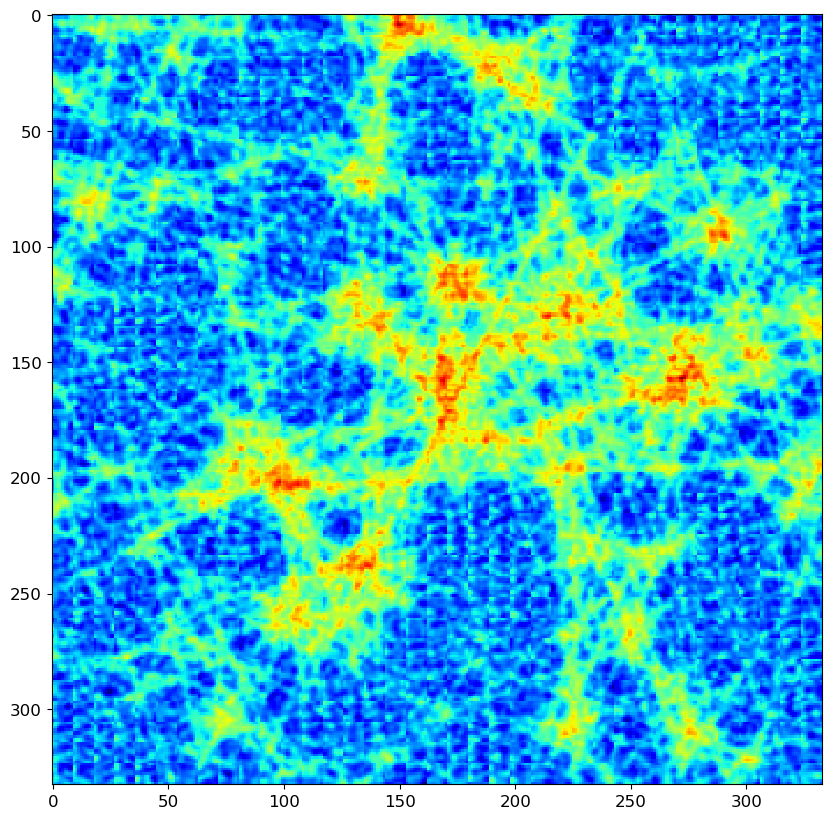

In [18]:
plt.rcParams["figure.figsize"] = (10, 10)
 
import matplotlib.pyplot as plt
plt.imshow(stitched[0], cmap = 'jet', interpolation='none')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


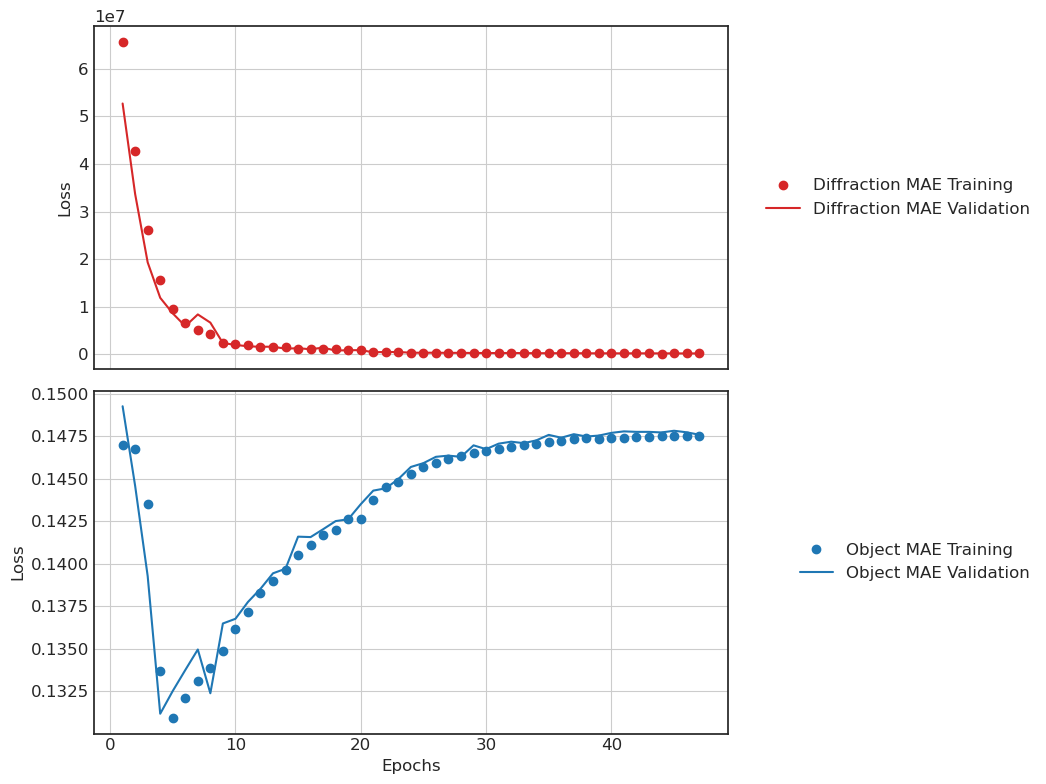

In [10]:
from ptycho import evaluation
reload(evaluation)

evaluation.plt_metrics(history, metric2 = 'trimmed_obj_loss')

phase min: 0.0 phase max: 0.06690287


/home/ollie/Documents/scratch/ptycho/notebooks/ptycho/evaluation.py:57: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(X_test)[i, :, :, channel], cmap = 'jet')
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


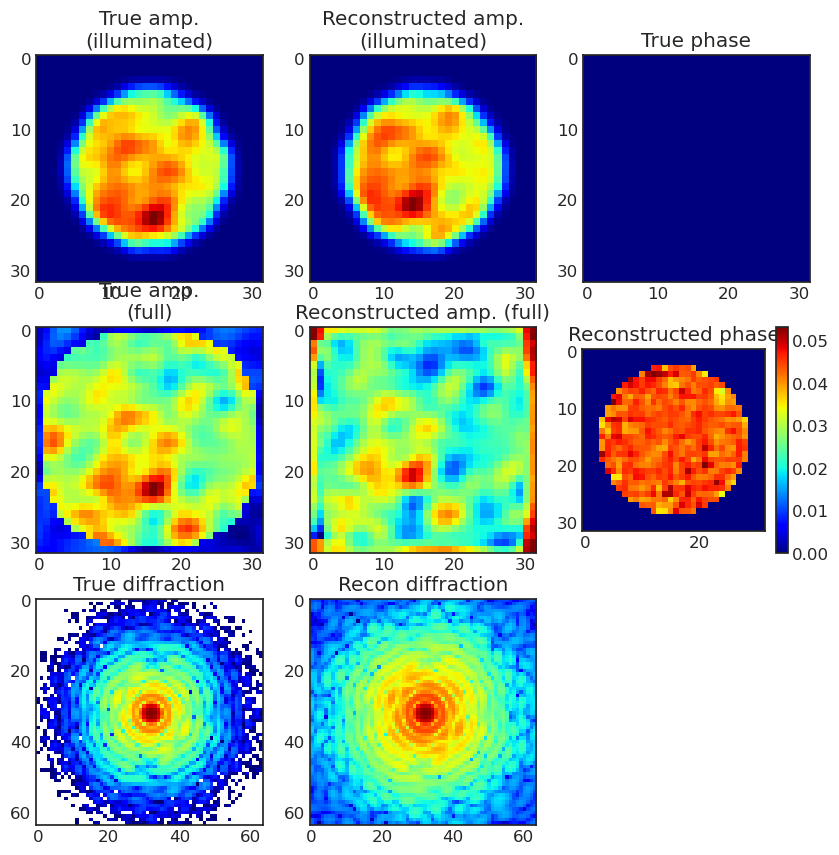

In [11]:
from ptycho import evaluation
evaluation.summarize(10, a, b, X_test, Y_I_test, Y_phi_test, probe.probe, 0)

phase min: 0.0 phase max: 0.06690287


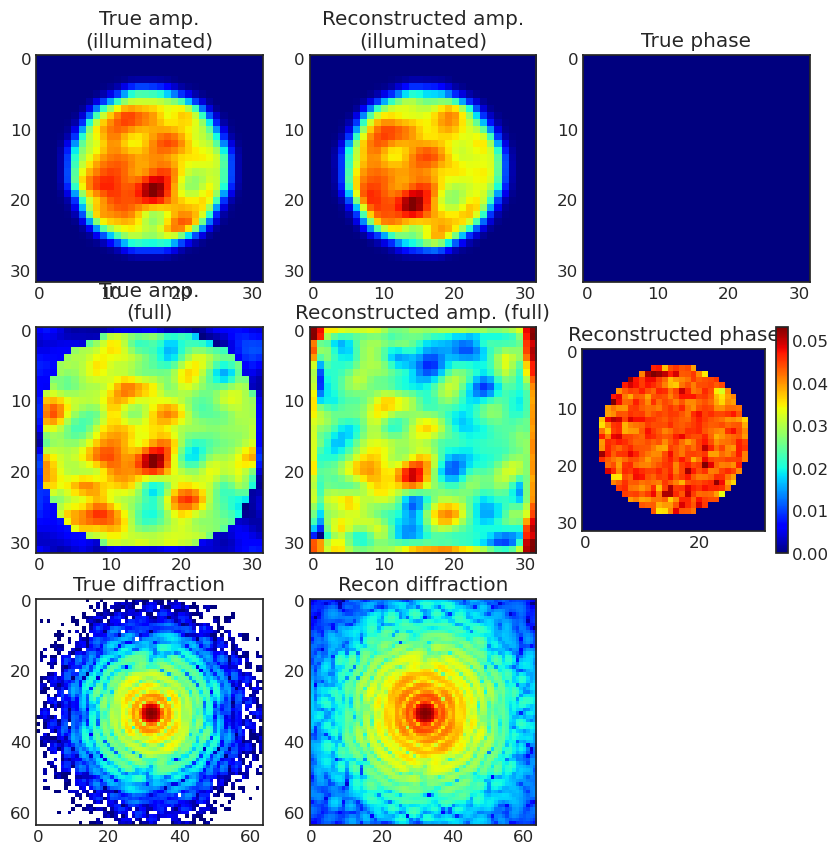

In [12]:
from ptycho import evaluation
evaluation.summarize(10, a, b, X_test, Y_I_test, Y_phi_test, probe.probe, 2)

## Opposite

Lines for training, GRF for testing

In [1]:
from ptycho import params as p
p.cfg['gridsize'] = 1

p.cfg['offset'] = 4
p.cfg['max_position_jitter'] = 10
p.cfg['nepochs'] = 60
p.cfg['output_prefix'] = 'tmp'
p.cfg['sim_jitter_scale'] = 0.
p.cfg['positions.provided'] = False
p.cfg['object.big'] = True
p.cfg['intensity_scale.trainable'] = True

p.cfg['data_source'] = 'lines'

p.cfg['gridsize'] = 1
p.cfg['nll_weight'] = 0.
p.cfg['mae_weight'] = 1.


from ptycho import generate_data as init

/home/ollie/anaconda3/envs/tf/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-04-17 20:19:45.432730: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-17 20:19:45.526484: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-17 20:19:45.881744: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared o

simulating gaussian position jitter, scale 0.0
Sampling on regular grid
input shape (None, 64, 64, 1)
Instructions for updating:
Please pass an integer value for `reinterpreted_batch_ndims`. The current behavior corresponds to `reinterpreted_batch_ndims=tf.size(distribution.batch_shape_tensor()) - 1`.
simulating gaussian position jitter, scale 0.0
Sampling on regular grid
1.0000033
nphoton 8.969574


In [2]:
Xtrain = init.X_train
Ytrain = (init.Y_I_train, init.Y_phi_train)
YY_I_test_full = init.YY_I_test_full

from importlib import reload
from ptycho import generate_data as init

p.cfg['data_source'] = 'grf'
reload(init)

init.X_train = Xtrain
init.Y_I_train, init.Y_phi_train = Ytrain
# init.YY_I_test_full = YY_I_test_full

simulating gaussian position jitter, scale 0.0
Sampling on regular grid
simulating gaussian position jitter, scale 0.0
Sampling on regular grid
1.0000031
nphoton 8.998918


In [3]:
from ptycho import train
from ptycho.train import *

offset 4
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 intensity_scaler (IntensitySca  (None, 64, 64, 1)   1           ['input[0][0]']                  
 ler)                                                                                             
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 64)   640         ['intensity_scaler[0][0]']       
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 64, 64)   36928       ['conv2d[0][0]']  

                                                                                                  
 distribution_lambda (Distribut  ((None, 64, 64, 1),  0          ['intensity_scaler_inv[0][0]']   
 ionLambda)                      (None, 64, 64, 1))                                               
                                                                                                  
Total params: 4,396,227
Trainable params: 4,392,131
Non-trainable params: 4,096
__________________________________________________________________________________________________
None
using nominal scan positions for training


2023-04-17 20:20:36.907485: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-04-17 20:20:36.907500: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-04-17 20:20:36.907521: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1664] Profiler found 1 GPUs
2023-04-17 20:20:36.909751: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcupti.so.11.2'; dlerror: libcupti.so.11.2: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/ollie/anaconda3/envs/tf/lib/:/home/ollie/anaconda3/envs/tf/lib/
2023-04-17 20:20:36.960770: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-04-17 20:20:36.960872: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1798] CUPTI activity buffer flushed


Epoch 1/60


2023-04-17 20:20:39.400922: I tensorflow/core/util/cuda_solvers.cc:179] Creating GpuSolver handles for stream 0x1ce46600
2023-04-17 20:20:40.106053: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


732/732 [==============================] - 12s 12ms/step - loss: 12.5182 - trimmed_obj_loss: 0.1988 - intensity_scaler_inv_loss: 12.5182 - distribution_lambda_loss: 33065538.0000 - probe_illumination_loss: 0.0282 - val_loss: 9.2743 - val_trimmed_obj_loss: 0.2028 - val_intensity_scaler_inv_loss: 9.2743 - val_distribution_lambda_loss: 6461512.5000 - val_probe_illumination_loss: 0.0290 - lr: 0.0010
Epoch 2/60
732/732 [==============================] - 8s 11ms/step - loss: 9.1974 - trimmed_obj_loss: 0.2077 - intensity_scaler_inv_loss: 9.1974 - distribution_lambda_loss: 6207834.0000 - probe_illumination_loss: 0.0282 - val_loss: 8.8057 - val_trimmed_obj_loss: 0.2038 - val_intensity_scaler_inv_loss: 8.8057 - val_distribution_lambda_loss: 5359318.0000 - val_probe_illumination_loss: 0.0290 - lr: 0.0010
Epoch 3/60
732/732 [==============================] - 8s 12ms/step - loss: 8.0286 - trimmed_obj_loss: 0.2096 - intensity_scaler_inv_loss: 8.0286 - distribution_lambda_loss: 3956262.5000 - probe_i

732/732 [==============================] - 8s 11ms/step - loss: 4.2694 - trimmed_obj_loss: 0.1704 - intensity_scaler_inv_loss: 4.2694 - distribution_lambda_loss: 810895.6875 - probe_illumination_loss: 0.0282 - val_loss: 4.5326 - val_trimmed_obj_loss: 0.1682 - val_intensity_scaler_inv_loss: 4.5326 - val_distribution_lambda_loss: 1024283.1875 - val_probe_illumination_loss: 0.0290 - lr: 0.0010
Epoch 22/60
731/732 [============================>.] - ETA: 0s - loss: 4.2124 - trimmed_obj_loss: 0.1714 - intensity_scaler_inv_loss: 4.2124 - distribution_lambda_loss: 797013.6875 - probe_illumination_loss: 0.0282
Epoch 22: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
732/732 [==============================] - 8s 11ms/step - loss: 4.2122 - trimmed_obj_loss: 0.1714 - intensity_scaler_inv_loss: 4.2122 - distribution_lambda_loss: 796857.3750 - probe_illumination_loss: 0.0282 - val_loss: 4.5355 - val_trimmed_obj_loss: 0.1692 - val_intensity_scaler_inv_loss: 4.5355 - val_distributi

732/732 [==============================] - 8s 11ms/step - loss: 3.3671 - trimmed_obj_loss: 0.2085 - intensity_scaler_inv_loss: 3.3671 - distribution_lambda_loss: 496124.4688 - probe_illumination_loss: 0.0282 - val_loss: 3.4277 - val_trimmed_obj_loss: 0.2072 - val_intensity_scaler_inv_loss: 3.4277 - val_distribution_lambda_loss: 516221.7812 - val_probe_illumination_loss: 0.0290 - lr: 1.2500e-04
Epoch 40/60
732/732 [==============================] - 8s 11ms/step - loss: 3.3631 - trimmed_obj_loss: 0.2096 - intensity_scaler_inv_loss: 3.3631 - distribution_lambda_loss: 494629.7812 - probe_illumination_loss: 0.0282 - val_loss: 3.4154 - val_trimmed_obj_loss: 0.2077 - val_intensity_scaler_inv_loss: 3.4154 - val_distribution_lambda_loss: 519074.6875 - val_probe_illumination_loss: 0.0290 - lr: 1.2500e-04
Epoch 41/60
732/732 [==============================] - 8s 12ms/step - loss: 3.3567 - trimmed_obj_loss: 0.2105 - intensity_scaler_inv_loss: 3.3567 - distribution_lambda_loss: 492751.1250 - probe_

732/732 [==============================] - 8s 12ms/step - loss: 3.2472 - trimmed_obj_loss: 0.2192 - intensity_scaler_inv_loss: 3.2472 - distribution_lambda_loss: 463087.1562 - probe_illumination_loss: 0.0282 - val_loss: 3.3333 - val_trimmed_obj_loss: 0.2170 - val_intensity_scaler_inv_loss: 3.3333 - val_distribution_lambda_loss: 489942.6250 - val_probe_illumination_loss: 0.0290 - lr: 1.0000e-04
Epoch 59/60
732/732 [==============================] - 8s 12ms/step - loss: 3.2439 - trimmed_obj_loss: 0.2195 - intensity_scaler_inv_loss: 3.2439 - distribution_lambda_loss: 462034.0312 - probe_illumination_loss: 0.0282 - val_loss: 3.3246 - val_trimmed_obj_loss: 0.2173 - val_intensity_scaler_inv_loss: 3.3246 - val_distribution_lambda_loss: 484369.2188 - val_probe_illumination_loss: 0.0290 - lr: 1.0000e-04
Epoch 60/60
129/129 [==============================] - 4s 23ms/step


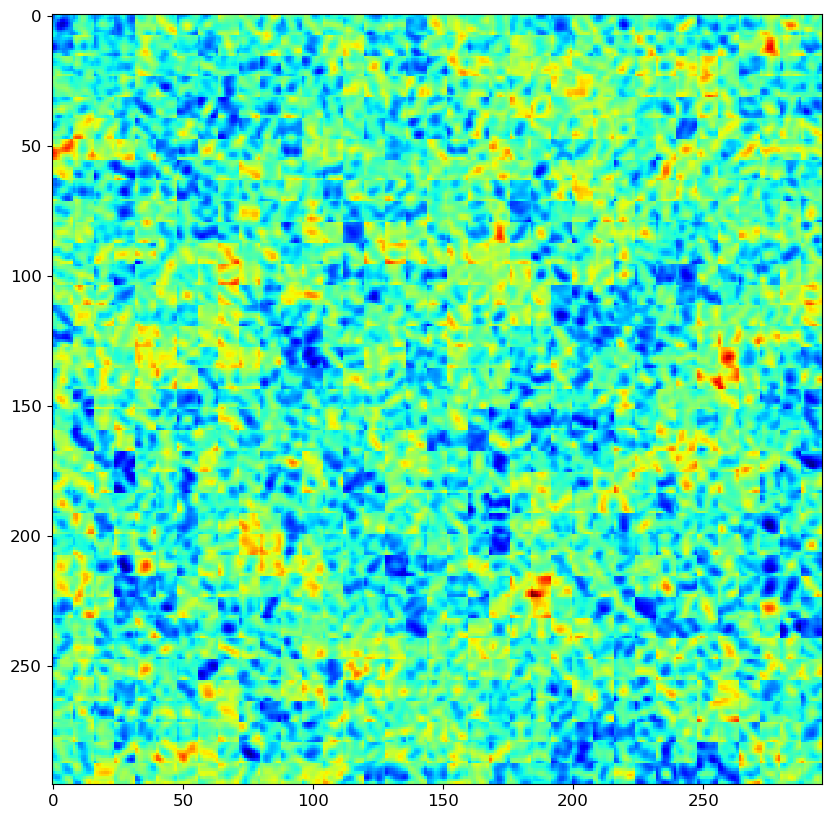

In [4]:
plt.rcParams["figure.figsize"] = (10, 10)
 
import matplotlib.pyplot as plt
plt.imshow(stitched[0], cmap = 'jet', interpolation='none')

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 32)   320         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 64, 32)   9248        ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 32, 32, 32)   0           ['conv2d_1[0][0]']               
                                                                                              

366/366 [==============================] - 4s 10ms/step - loss: 0.0061 - conv2d_12_loss: 0.0060 - conv2d_19_loss: 2.6456e-05 - val_loss: 0.0057 - val_conv2d_12_loss: 0.0057 - val_conv2d_19_loss: 2.0168e-05 - lr: 0.0010
Epoch 9/60
366/366 [==============================] - 4s 10ms/step - loss: 0.0061 - conv2d_12_loss: 0.0061 - conv2d_19_loss: 2.6410e-05 - val_loss: 0.0059 - val_conv2d_12_loss: 0.0059 - val_conv2d_19_loss: 2.0391e-05 - lr: 0.0010
Epoch 10/60
364/366 [============================>.] - ETA: 0s - loss: 0.0061 - conv2d_12_loss: 0.0061 - conv2d_19_loss: 2.6383e-05
Epoch 10: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
366/366 [==============================] - 4s 10ms/step - loss: 0.0061 - conv2d_12_loss: 0.0061 - conv2d_19_loss: 2.6379e-05 - val_loss: 0.0059 - val_conv2d_12_loss: 0.0059 - val_conv2d_19_loss: 2.0432e-05 - lr: 0.0010
Epoch 11/60
366/366 [==============================] - 4s 10ms/step - loss: 0.0056 - conv2d_12_loss: 0.0056 - conv2d_19_los

Epoch 40/60
366/366 [==============================] - 4s 10ms/step - loss: 0.0053 - conv2d_12_loss: 0.0053 - conv2d_19_loss: 1.5100e-05 - val_loss: 0.0055 - val_conv2d_12_loss: 0.0054 - val_conv2d_19_loss: 1.7518e-06 - lr: 1.0000e-04
Epoch 41/60
366/366 [==============================] - 4s 10ms/step - loss: 0.0052 - conv2d_12_loss: 0.0052 - conv2d_19_loss: 1.5046e-05 - val_loss: 0.0055 - val_conv2d_12_loss: 0.0055 - val_conv2d_19_loss: 3.8797e-06 - lr: 1.0000e-04
Epoch 42/60
366/366 [==============================] - 4s 10ms/step - loss: 0.0052 - conv2d_12_loss: 0.0052 - conv2d_19_loss: 1.5149e-05 - val_loss: 0.0055 - val_conv2d_12_loss: 0.0055 - val_conv2d_19_loss: 3.3063e-05 - lr: 1.0000e-04
Epoch 43/60
366/366 [==============================] - 4s 10ms/step - loss: 0.0052 - conv2d_12_loss: 0.0052 - conv2d_19_loss: 1.5356e-05 - val_loss: 0.0055 - val_conv2d_12_loss: 0.0055 - val_conv2d_19_loss: 4.2599e-05 - lr: 1.0000e-04
Epoch 44/60
366/366 [==============================] - 4s 10

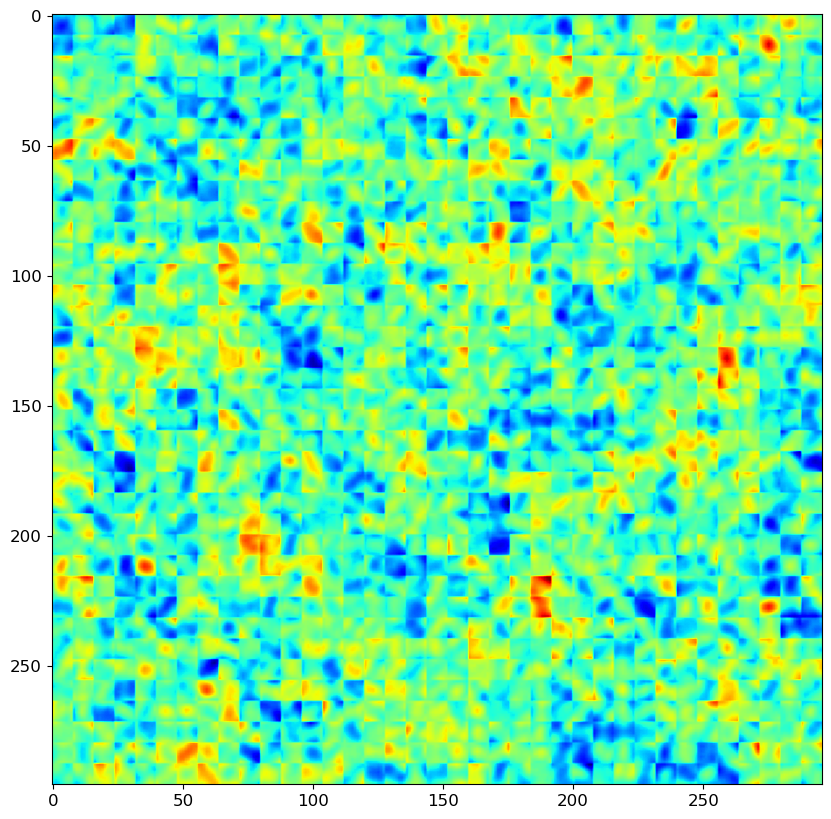

In [6]:
from ptycho import params as p
p.cfg['gridsize'] = 1
p.cfg['n_filters_scale'] = 1

from ptycho.generate_data import *

from ptycho import baselines as bl

reload(bl)

baseline_model = bl.train((X_train[:, :, :, :1]), Y_I_train[:, :, :, :1], Y_phi_train[:, :, :, :1])

plt.rcParams["figure.figsize"] = (10, 10)

baseline_pred_I, baseline_pred_phi = baseline_model.predict([X_test[:, :, :, 0] * bl.params.params()['intensity_scale']])
baseline_stitched = stitch(baseline_pred_I, norm_Y_I_test, nsegments=37)

plt.imshow(baseline_stitched[0], cmap = 'jet')#, vmin = vmin, vmax = vmax)

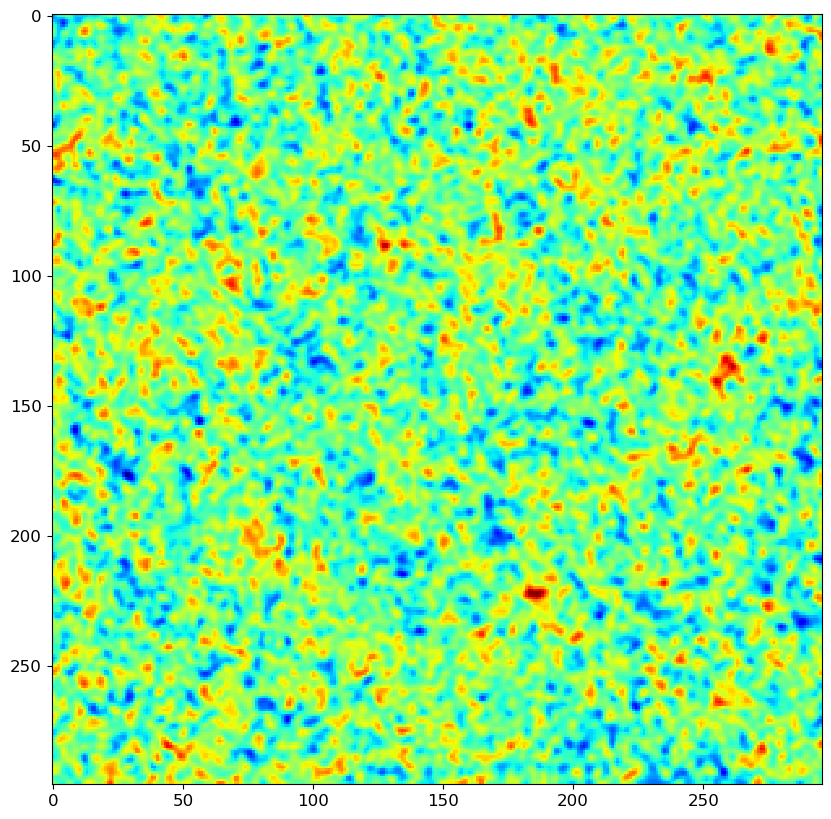

In [7]:
vmin = np.min(YY_I_test_full[0, clipleft: -clipright, clipleft: -clipright])
vmax = np.max(YY_I_test_full[0, clipleft: -clipright, clipleft: -clipright])
plt.imshow(YY_ground_truth, interpolation = 'none',
          cmap = 'jet')

In [23]:
from importlib import reload
import matplotlib.pyplot as plt
from ptycho import params as p

p.cfg['offset'] = 4

# Swap NLL and MAE weights
p.cfg['nll_weight'] = 0.
p.cfg['mae_weight'] = 1.
p.cfg['intensity_scale.trainable'] = True
p.cfg['object.big'] = True
p.cfg['n_filters_scale'] = 2


from ptycho import train, model
reload(model)
reload(train)

p.cfg
from ptycho.train import *

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 64, 64, 4)]  0           []                               
                                                                                                  
 intensity_scaler (IntensitySca  (None, 64, 64, 4)   1           ['input[0][0]']                  
 ler)                                                                                             
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 64)   2368        ['intensity_scaler[0][0]']       
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 64, 64)   36928       ['conv2d[0][0]']           

                                                                                                  
 distribution_lambda (Distribut  ((None, 64, 64, 4),  0          ['intensity_scaler_inv[0][0]']   
 ionLambda)                      (None, 64, 64, 4))                                               
                                                                                                  
Total params: 4,401,414
Trainable params: 4,397,318
Non-trainable params: 4,096
__________________________________________________________________________________________________
None
offset 4


2023-04-02 23:52:24.263672: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-04-02 23:52:24.263686: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.


using nominal scan positions for training


2023-04-02 23:52:24.572281: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-04-02 23:52:24.572383: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1798] CUPTI activity buffer flushed


Epoch 1/60
732/732 [==============================] - 11s 13ms/step - loss: 14.1258 - trimmed_obj_loss: 0.1528 - intensity_scaler_inv_loss: 14.1258 - distribution_lambda_loss: 83760952.0000 - probe_illumination_loss: 0.0254 - val_loss: 13.8476 - val_trimmed_obj_loss: 0.1529 - val_intensity_scaler_inv_loss: 13.8476 - val_distribution_lambda_loss: 66196008.0000 - val_probe_illumination_loss: 0.0253 - lr: 0.0010
Epoch 2/60
732/732 [==============================] - 9s 13ms/step - loss: 12.2771 - trimmed_obj_loss: 0.1537 - intensity_scaler_inv_loss: 12.2771 - distribution_lambda_loss: 46076492.0000 - probe_illumination_loss: 0.0254 - val_loss: 10.6710 - val_trimmed_obj_loss: 0.1538 - val_intensity_scaler_inv_loss: 10.6710 - val_distribution_lambda_loss: 30271086.0000 - val_probe_illumination_loss: 0.0253 - lr: 0.0010
Epoch 3/60
732/732 [==============================] - 9s 13ms/step - loss: 9.7179 - trimmed_obj_loss: 0.1507 - intensity_scaler_inv_loss: 9.7179 - distribution_lambda_loss: 24

732/732 [==============================] - 9s 13ms/step - loss: 1.8785 - trimmed_obj_loss: 0.1083 - intensity_scaler_inv_loss: 1.8785 - distribution_lambda_loss: 543609.1250 - probe_illumination_loss: 0.0254 - val_loss: 1.9769 - val_trimmed_obj_loss: 0.1084 - val_intensity_scaler_inv_loss: 1.9769 - val_distribution_lambda_loss: 614419.0625 - val_probe_illumination_loss: 0.0253 - lr: 1.2500e-04
Epoch 40/60
732/732 [==============================] - 9s 13ms/step - loss: 1.8627 - trimmed_obj_loss: 0.1082 - intensity_scaler_inv_loss: 1.8627 - distribution_lambda_loss: 535394.7500 - probe_illumination_loss: 0.0254 - val_loss: 1.9609 - val_trimmed_obj_loss: 0.1082 - val_intensity_scaler_inv_loss: 1.9609 - val_distribution_lambda_loss: 604013.8750 - val_probe_illumination_loss: 0.0253 - lr: 1.2500e-04
Epoch 41/60
732/732 [==============================] - 9s 13ms/step - loss: 1.8577 - trimmed_obj_loss: 0.1082 - intensity_scaler_inv_loss: 1.8577 - distribution_lambda_loss: 532303.4375 - probe_

In [24]:
pinn_ol_mae_score = mae(trim(reassemble(b)[0]), trim(YY_ground_truth)) 
pinn_ol_mae_score

mean scale adjustment: 0.5810751958824001


0.002899877994199223

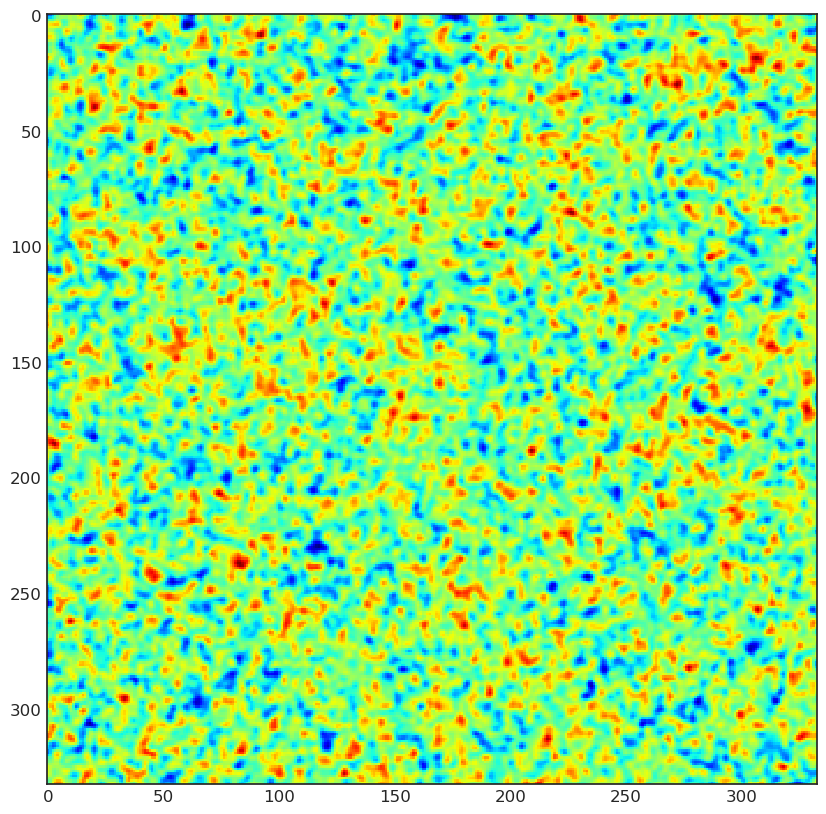

In [25]:
plt.rcParams["figure.figsize"] = (10, 10)

stitched = stitch(b, norm_Y_I_test,
                  #nsegments=37,
                  norm = False)

plt.imshow(stitched[0], interpolation = 'none', cmap = 'jet')
#plt.imshow(stitched[0], interpolation = 'none', vmin = vmin, vmax = vmax, cmap = 'jet')

phase min: -0.07108539 phase max: 0.0715644


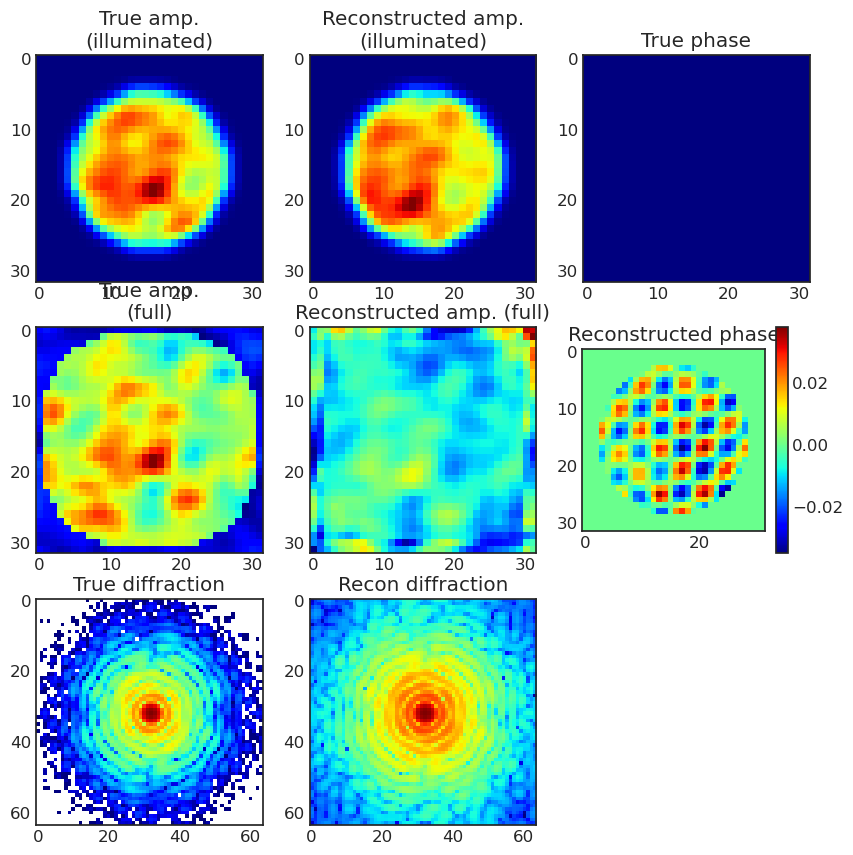

In [26]:
# Offset 4, jitter = 0 val_loss: 2625558.
from ptycho import evaluation
evaluation.summarize(10, a, b, X_test, Y_I_test, Y_phi_test, probe.probe, 2)

## PtychoNN with overlaps

In [24]:
from importlib import reload
import matplotlib.pyplot as plt

from ptycho import params as p

p.cfg['data_source'] = 'grf'
p.cfg['n_filters_scale'] = 1
p.cfg['gridsize'] = 2

from ptycho import baselines as bl
reload(bl)

from ptycho.initialize_data import *

baseline_model_overlap = bl.train((X_train[:, :, :, :4]),
                          Y_I_train[:, :, :, :4], Y_phi_train[:, :, :, :4])

baseline_overlap_pred_I, baseline_overlap_pred_phi = baseline_model_overlap.predict(
    [X_test[:, :, :, :4]  * bl.params.params()['intensity_scale']])
baseline_overlap_stitched = stitch(baseline_overlap_pred_I[:, :, :, :1], norm_Y_I_test)


# For comparison to the 'baseline' model (PtychoNN) we need to crop/shift in a different way
def xyshift(arr2d, dx, dy):
    from scipy.ndimage.interpolation import shift
    arr2d = np.roll(arr2d, dx, axis = 0)
    arr2d = np.roll(arr2d, dy, axis = 1)
    return arr2d

YY_baseline_overlap = xyshift(baseline_overlap_stitched[0], -2, -2)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 4)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 32)   1184        ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 64, 32)   9248        ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 32, 32, 32)   0           ['conv2d_1[0][0]']               
                                                                                              

366/366 [==============================] - 4s 12ms/step - loss: 0.0022 - conv2d_12_loss: 0.0022 - conv2d_19_loss: 1.0430e-05 - val_loss: 0.0022 - val_conv2d_12_loss: 0.0022 - val_conv2d_19_loss: 1.7458e-05 - lr: 1.0000e-04
Epoch 40/60
366/366 [==============================] - 4s 12ms/step - loss: 0.0022 - conv2d_12_loss: 0.0022 - conv2d_19_loss: 1.0508e-05 - val_loss: 0.0022 - val_conv2d_12_loss: 0.0022 - val_conv2d_19_loss: 1.5524e-05 - lr: 1.0000e-04
Epoch 41/60
366/366 [==============================] - 4s 12ms/step - loss: 0.0022 - conv2d_12_loss: 0.0022 - conv2d_19_loss: 1.0428e-05 - val_loss: 0.0022 - val_conv2d_12_loss: 0.0022 - val_conv2d_19_loss: 1.5979e-06 - lr: 1.0000e-04
Epoch 42/60
366/366 [==============================] - 4s 12ms/step - loss: 0.0021 - conv2d_12_loss: 0.0021 - conv2d_19_loss: 1.0387e-05 - val_loss: 0.0021 - val_conv2d_12_loss: 0.0021 - val_conv2d_19_loss: 1.0016e-05 - lr: 1.0000e-04
Epoch 43/60
366/366 [==============================] - 4s 12ms/step - lo

In [25]:
mae(trim(YY_baseline_overlap), trim(YY_ground_truth))

mean scale adjustment: 4.265865


0.10606459

In [29]:
YY_I_train_full.shape


TensorShape([9, 392, 392, 1])

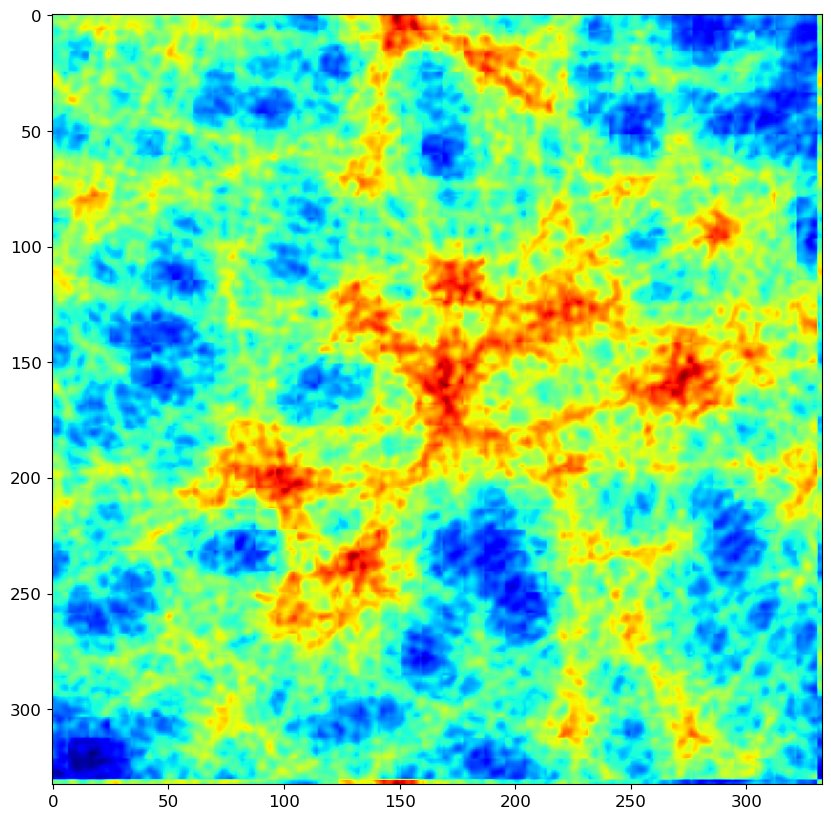

In [26]:
plt.rcParams["figure.figsize"] = (10, 10)

plt.imshow(YY_baseline_overlap, cmap = 'jet')

## PINN + NLL

In [44]:
p.cfg['gridsize'] = 1
p.cfg['nll_weight'] = 1.
p.cfg['mae_weight'] = 0.

from ptycho import initialize_data as init
reload(init)

# print(p.cfg)
from ptycho.initialize_data import *

reload(train.model)
reload(train)
from ptycho.train import *

simulating gaussian position jitter, scale 0.0
Sampling on regular grid
simulating gaussian position jitter, scale 0.0
Sampling on regular grid
1.0000055
nphoton 8.998385
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 intensity_scaler (IntensitySca  (None, 64, 64, 1)   1           ['input[0][0]']                  
 ler)                                                                                             
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 32)   320         ['intensity_scaler[0][0]']       
                    

                                                                                                  
 trimmed_obj (Lambda)           (None, 64, 64, 1)    0           ['padded_obj_2[0][0]']           
                                                                                                  
 distribution_lambda (Distribut  ((None, 64, 64, 1),  0          ['intensity_scaler_inv[0][0]']   
 ionLambda)                      (None, 64, 64, 1))                                               
                                                                                                  
Total params: 1,103,459
Trainable params: 1,099,363
Non-trainable params: 4,096
__________________________________________________________________________________________________
None
offset 4


2023-04-03 00:44:06.435972: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-04-03 00:44:06.435994: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.


using nominal scan positions for training


2023-04-03 00:44:06.752664: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-04-03 00:44:06.752769: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1798] CUPTI activity buffer flushed


Epoch 1/60


2023-04-03 00:44:09.012115: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


732/732 [==============================] - 7s 8ms/step - loss: 12371765.0000 - trimmed_obj_loss: 0.2109 - intensity_scaler_inv_loss: 12.4299 - distribution_lambda_loss: 12371765.0000 - probe_illumination_loss: 0.0239 - val_loss: 7597662.0000 - val_trimmed_obj_loss: 0.2248 - val_intensity_scaler_inv_loss: 11.3401 - val_distribution_lambda_loss: 7597662.0000 - val_probe_illumination_loss: 0.0237 - lr: 0.0010
Epoch 2/60
732/732 [==============================] - 5s 7ms/step - loss: 5496067.5000 - trimmed_obj_loss: 0.2235 - intensity_scaler_inv_loss: 10.0961 - distribution_lambda_loss: 5496067.5000 - probe_illumination_loss: 0.0239 - val_loss: 3687345.5000 - val_trimmed_obj_loss: 0.2225 - val_intensity_scaler_inv_loss: 8.8728 - val_distribution_lambda_loss: 3687345.5000 - val_probe_illumination_loss: 0.0237 - lr: 0.0010
Epoch 3/60
732/732 [==============================] - 5s 7ms/step - loss: 2564551.7500 - trimmed_obj_loss: 0.2233 - intensity_scaler_inv_loss: 7.7024 - distribution_lambda_

732/732 [==============================] - 5s 7ms/step - loss: 186513.0781 - trimmed_obj_loss: 0.2166 - intensity_scaler_inv_loss: 2.4205 - distribution_lambda_loss: 186513.0781 - probe_illumination_loss: 0.0239 - val_loss: 194055.0938 - val_trimmed_obj_loss: 0.2173 - val_intensity_scaler_inv_loss: 2.4705 - val_distribution_lambda_loss: 194055.0938 - val_probe_illumination_loss: 0.0237 - lr: 1.2500e-04
Epoch 39/60
732/732 [==============================] - 5s 7ms/step - loss: 184751.2031 - trimmed_obj_loss: 0.2169 - intensity_scaler_inv_loss: 2.4091 - distribution_lambda_loss: 184751.2031 - probe_illumination_loss: 0.0239 - val_loss: 190703.5938 - val_trimmed_obj_loss: 0.2172 - val_intensity_scaler_inv_loss: 2.4528 - val_distribution_lambda_loss: 190703.5938 - val_probe_illumination_loss: 0.0237 - lr: 1.2500e-04
Epoch 40/60
732/732 [==============================] - 5s 7ms/step - loss: 182961.2656 - trimmed_obj_loss: 0.2171 - intensity_scaler_inv_loss: 2.3967 - distribution_lambda_loss

Epoch 58/60
732/732 [==============================] - 5s 7ms/step - loss: 159584.1875 - trimmed_obj_loss: 0.2208 - intensity_scaler_inv_loss: 2.2396 - distribution_lambda_loss: 159584.1875 - probe_illumination_loss: 0.0239 - val_loss: 169945.4688 - val_trimmed_obj_loss: 0.2213 - val_intensity_scaler_inv_loss: 2.3033 - val_distribution_lambda_loss: 169945.4688 - val_probe_illumination_loss: 0.0237 - lr: 1.2500e-04
Epoch 59/60
732/732 [==============================] - 5s 7ms/step - loss: 158494.3438 - trimmed_obj_loss: 0.2210 - intensity_scaler_inv_loss: 2.2326 - distribution_lambda_loss: 158494.3438 - probe_illumination_loss: 0.0239 - val_loss: 162460.8438 - val_trimmed_obj_loss: 0.2213 - val_intensity_scaler_inv_loss: 2.2605 - val_distribution_lambda_loss: 162460.8438 - val_probe_illumination_loss: 0.0237 - lr: 1.2500e-04
Epoch 60/60
129/129 [==============================] - 3s 20ms/step


phase min: 0.0 phase max: 3.0008888


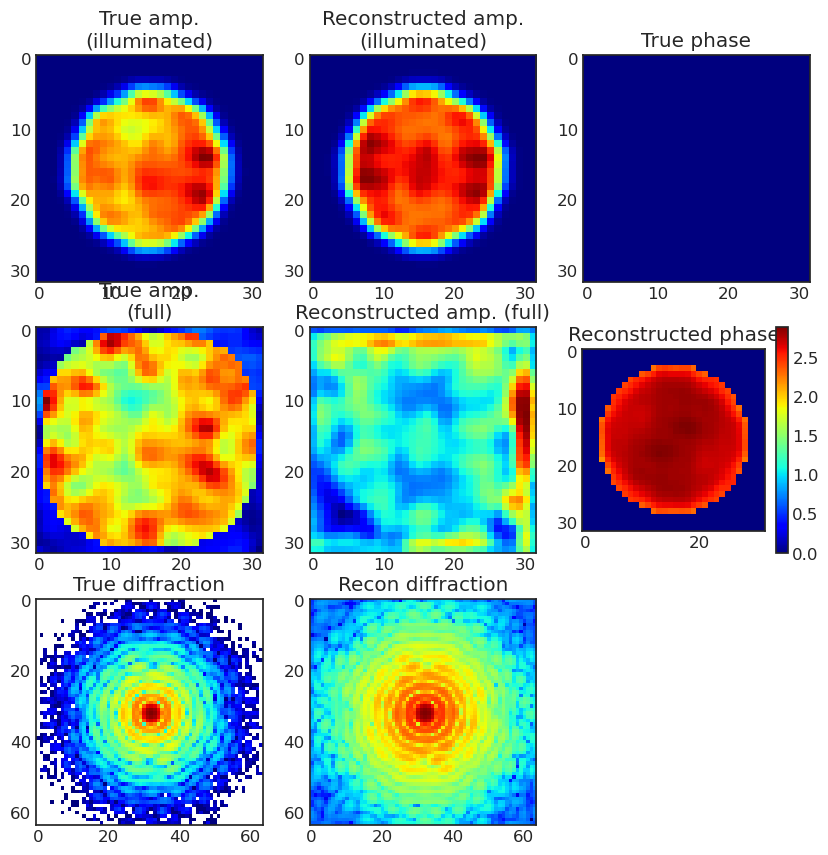

In [51]:
from ptycho import evaluation
evaluation.summarize(40, a, b, X_test, Y_I_test, Y_phi_test, probe.probe, 0)

In [49]:
mae(trim(reassemble(b)[0]), trim(YY_ground_truth)) # PINN, no overlap, 60 epochs, NLL

mean scale adjustment: 0.8142481313372041


0.02400422309020544

## PINN, MAE, no overlap:

phase min: 0.0 phase max: 2.0833633


/home/ollie/Documents/scratch/ptycho/notebooks/ptycho/evaluation.py:57: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(X_test)[i, :, :, channel], cmap = 'jet')


mean scale adjustment: 0.7948697362890891


0.02638679576895591

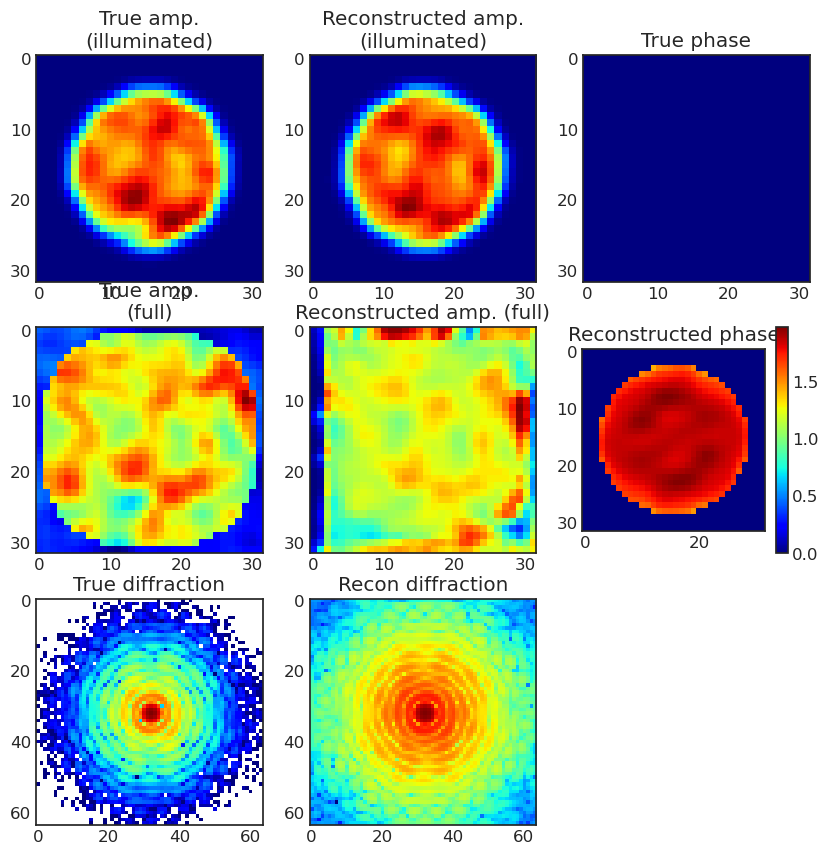

In [37]:
from ptycho import evaluation
evaluation.summarize(10, a, b, X_test, Y_I_test, Y_phi_test, probe.probe, 0)

mean scale adjustment: 0.7948697362890891


0.02638679576895591

## PtychoNN (vanilla)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 32)   320         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 64, 32)   9248        ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 32, 32, 32)   0           ['conv2d_1[0][0]']               
                                                                                              

Epoch 40/60
366/366 [==============================] - 4s 10ms/step - loss: 0.0017 - conv2d_12_loss: 0.0017 - conv2d_19_loss: 7.5864e-06 - val_loss: 0.0017 - val_conv2d_12_loss: 0.0017 - val_conv2d_19_loss: 6.0352e-06 - lr: 1.0000e-04
Epoch 41/60
366/366 [==============================] - 4s 10ms/step - loss: 0.0017 - conv2d_12_loss: 0.0017 - conv2d_19_loss: 7.4834e-06 - val_loss: 0.0017 - val_conv2d_12_loss: 0.0017 - val_conv2d_19_loss: 1.4664e-05 - lr: 1.0000e-04
Epoch 42/60
366/366 [==============================] - 4s 10ms/step - loss: 0.0016 - conv2d_12_loss: 0.0016 - conv2d_19_loss: 7.5864e-06 - val_loss: 0.0017 - val_conv2d_12_loss: 0.0017 - val_conv2d_19_loss: 6.0753e-06 - lr: 1.0000e-04
Epoch 43/60
366/366 [==============================] - 4s 10ms/step - loss: 0.0016 - conv2d_12_loss: 0.0016 - conv2d_19_loss: 7.4834e-06 - val_loss: 0.0016 - val_conv2d_12_loss: 0.0016 - val_conv2d_19_loss: 1.4658e-05 - lr: 1.0000e-04
Epoch 44/60
366/366 [==============================] - 4s 10

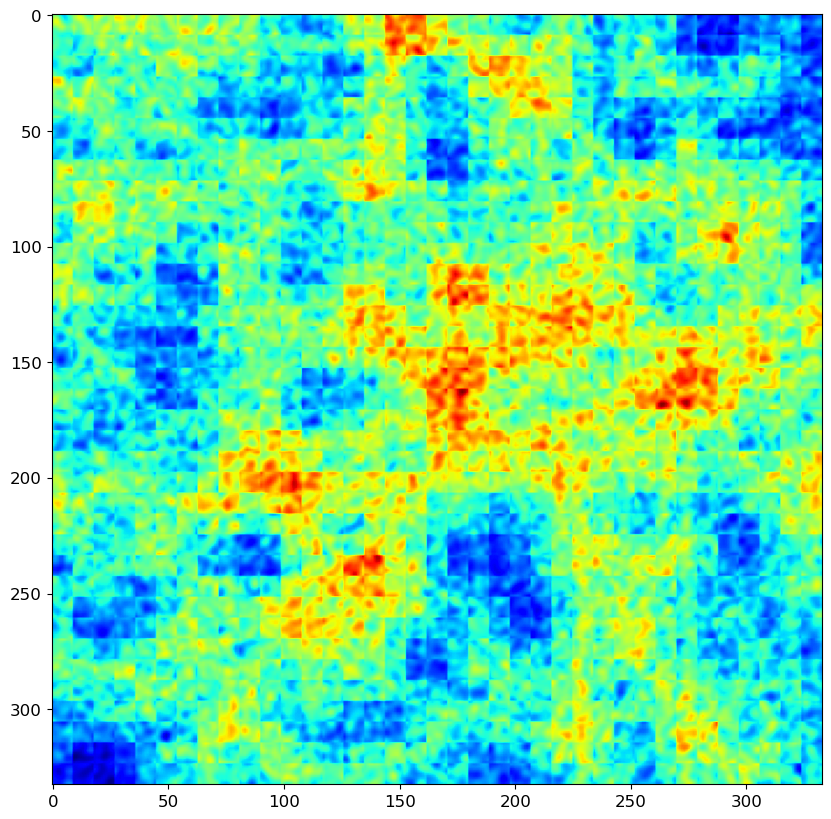

In [31]:
from ptycho import params as p
p.cfg['gridsize'] = 1
p.cfg['n_filters_scale'] = 1

from ptycho.initialize_data import *

from ptycho import baselines as bl

reload(bl)

baseline_model = bl.train((X_train[:, :, :, :1]), Y_I_train[:, :, :, :1], Y_phi_train[:, :, :, :1])

plt.rcParams["figure.figsize"] = (10, 10)

baseline_pred_I, baseline_pred_phi = baseline_model.predict([X_test[:, :, :, 0] * bl.params.params()['intensity_scale']])
baseline_stitched = stitch(baseline_pred_I, norm_Y_I_test, nsegments=37)

plt.imshow(baseline_stitched[0], cmap = 'jet')#, vmin = vmin, vmax = vmax)

In [32]:
i = 0
YY_ground_truth = YY_I_test_full[i, clipleft: -clipright, clipleft: -clipright]

ptychoNN_mae = mae(trim(baseline_stitched[i]), trim(YY_ground_truth))
ptychoNN_mae

mean scale adjustment: 4.3756933


0.29807526

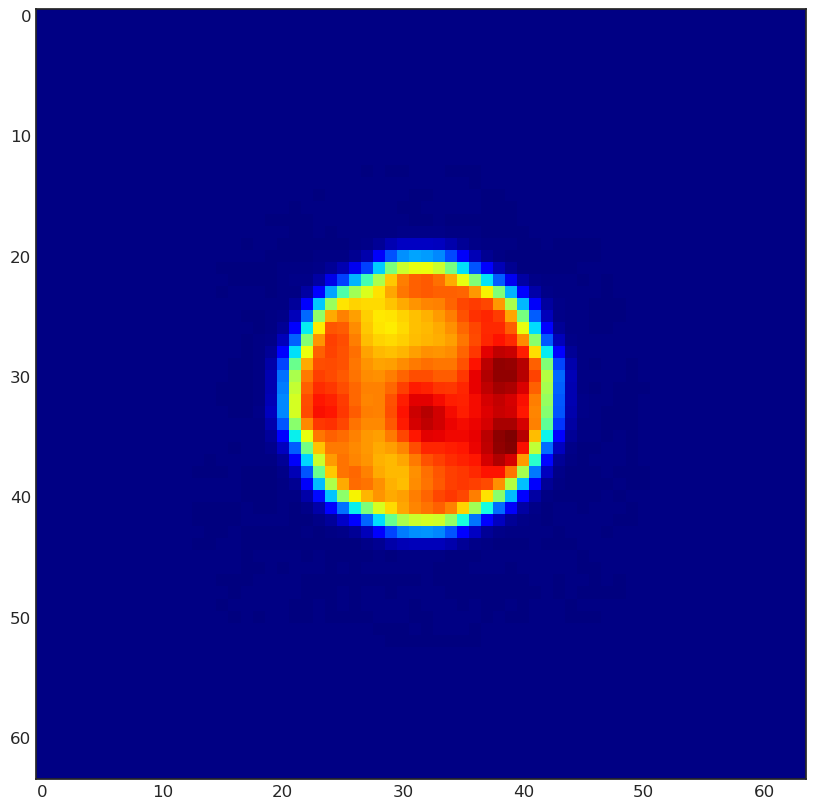

In [53]:
plt.imshow(baseline_pred_I[40], cmap = 'jet')

In [ ]:
# YY_baseline = xyshift(baseline_stitched[0], -2, -2)


### Norm conservation consistency check:

In [1]:
print(np.linalg.norm(X_train[0]) /  np.linalg.norm(Y_I_train[0]))

def normed_ff_np(arr):
    return (f.fftshift(np.absolute(f.fft2(np.array(arr)))) / np.sqrt(h * w))

NameError: name 'np' is not defined

### Inversion symmetry check:

### np / tf consistency check:

In [12]:
intensity_scale

2722.3948

### Number of photons consistency check

In [13]:
np.log10(np.sum((X_train[:, :, :] * intensity_scale)**2, axis = (1, 2))).mean()

8.996867

In [14]:
from ptycho import fourier as f
from ptycho import tf_helper as hh

/tmp/ipykernel_1258541/3066293683.py:18: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(tmp),
/tmp/ipykernel_1258541/3066293683.py:22: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(X_train[0, :, :, 0]), cmap = 'jet')


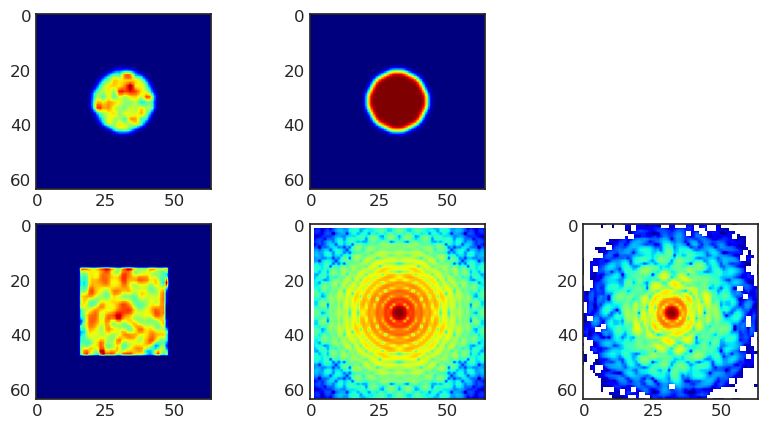

In [15]:
plt.rcParams["figure.figsize"] = (10, 5)


plt.subplot(2, 3, 1)

plt.imshow(Y_I_train[0, :, :, 0], cmap = 'jet')

plt.subplot(2, 3, 2)
plt.imshow(np.absolute(model.autoencoder.variables[-1]), cmap = 'jet')
# plt.colorbar()


plt.subplot(2, 3, 4)
plt.imshow(np.absolute(b[100, :, :, 0]), cmap = 'jet')

plt.subplot(2, 3, 5)
tmp = np.absolute(f.fftshift(f.fft2(np.array(model.autoencoder.variables[-1][:, :, 0]))))
plt.imshow(np.log(tmp),
          cmap  ='jet')

plt.subplot(2, 3, 6)
plt.imshow(np.log(X_train[0, :, :, 0]), cmap = 'jet')

# for i, v in enumerate(model.autoencoder.variables):
#     print(i, v.shape)

In [16]:
from ptycho import baselines as bl
# from ptycho.params import params

In [7]:
YY_I_test_full[0, clipleft: -clipright, clipleft: -clipright].shape, stitched.shape

NameError: name 'stitched' is not defined

In [38]:
# reload(bl)
bl.nepochs = 45

In [41]:
plt.imshow(baseline_pred_I[10], cmap = 'jet')

NameError: name 'baseline_pred_I' is not defined

In [3]:
reload(bl)

<module 'ptycho.baselines' from '/home/ollie/Documents/scratch/ptycho/notebooks/ptycho/baselines.py'>

In [14]:
np.mean(trim(YY_ground_truth))

0.5018057011888307

In [15]:
np.mean(trim(baseline_overlap_stitched[0]))

1.972057e-05

In [10]:
Y_I_test.shape

TensorShape([4107, 64, 64, 4])

In [9]:
np.percentile(Y_I_test, 10)

6.249541439906636e-10

In [6]:
baseline_pred_I_overlap, baseline_pred_phi_overlap = baseline_model_overlap.predict([X_test[:, :, :, :] * bl.params.params()['intensity_scale']])

129/129 [==============================] - 1s 8ms/step


In [7]:
baseline_stitched_overlap = stitch(baseline_pred_I_overlap, norm_Y_I_test, nsegments=37)

In [13]:
# from ptycho import initialize_data as init

In [10]:
# from ptycho.initialize_data import *

In [8]:
mae(trim(baseline_stitched_overlap[0]), trim(YY_ground_truth))

mean scale adjustment: 2.7490861491115413e-05


3.947053153642818e-06

In [115]:
ntake = 1000
nll_pinn = model.fn_poisson_nll(
    X_test[:ntake, :, :, :] * params()['intensity_scale'],
    a[:ntake, :, :, :] * params()['intensity_scale'])

In [273]:
plt.rcParams["figure.figsize"] = (5, 5)

(0.05004061, 0.15838294)

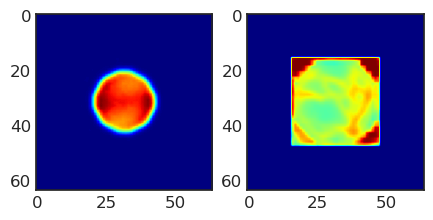

In [281]:
# plt.subplots(1, 2, 2)
plt.subplot(1, 2, 1)
plt.imshow(baseline_pred_I[100, :, :, 0], cmap = 'jet')
plt.subplot(1, 2, 2)
plt.imshow(np.absolute(b[100, :, :, 0]), cmap = 'jet')
baseline_pred_I[100, :, :, 0].mean(), np.mean(np.absolute(b[100, :, :, 0]))

In [183]:
from ptycho import physics
baseline_pred_diff_amplitude = hh.pad_and_diffract(baseline_pred_I, 64, 64, False)[0]

## Evaluation (NLL and MAE)

In [165]:
nll_baseline = model.fn_poisson_nll(
    X_test[:ntake, :, :, :1] * params()['intensity_scale'],
    baseline_pred_diff_amplitude[:ntake, :, :, :] * params()['intensity_scale'])

In [172]:
bopi_flat = hh._channel_to_flat(baseline_overlap_pred_I)
baseline_overlap_pred_diff_amplitude = hh._flat_to_channel(hh.pad_and_diffract(bopi_flat, 64, 64, False)[0])

In [ ]:
nll_baseline_overlap = model.fn_poisson_nll(
    X_test[:ntake, :, :, :] * params()['intensity_scale'],
    baseline_overlap_pred_diff_amplitude[:ntake, :, :, :] * params()['intensity_scale'])

In [206]:
np.mean(nll_baseline_overlap) / (4 * 64 * 64)

588144.6875

In [208]:
np.mean(nll_baseline) / (64 * 64)

587291.25

In [210]:
np.mean(nll_pinn) / (4 * 64 * 64)

92.91577911376953

In [10]:
Itest = (X_test * p.get('intensity_scale'))**2

In [12]:
Itest.shape

TensorShape([4107, 64, 64, 1])

In [17]:
np.max(Itest, axis = 1).max(axis = 1).mean()

100118650.0

/tmp/ipykernel_1142737/2294212082.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.sqrt(Itest[0, :, :, 0])), cmap = 'jet')


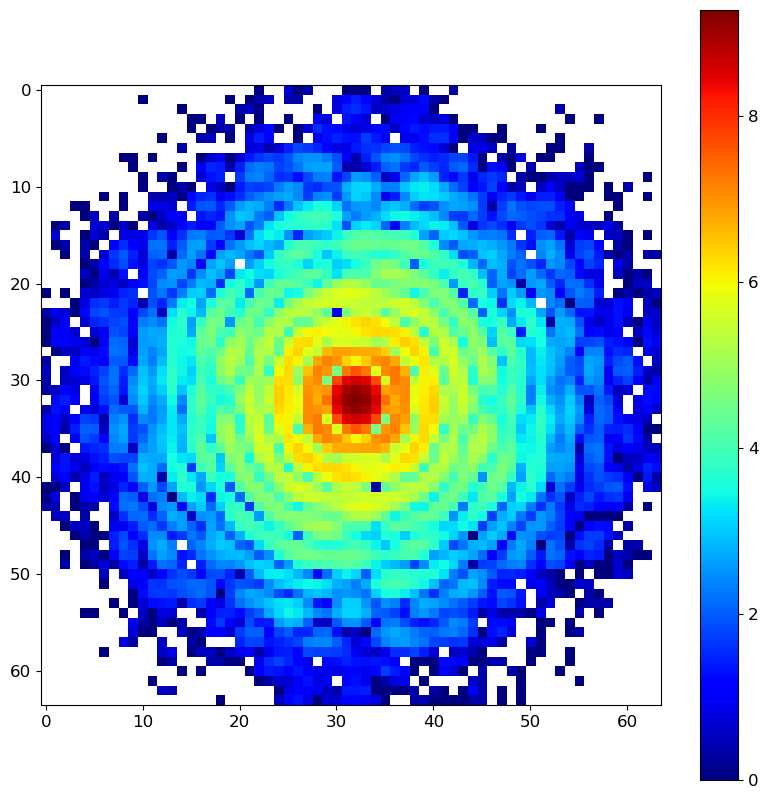

In [22]:
plt.imshow(np.log(np.sqrt(Itest[0, :, :, 0])), cmap = 'jet')
plt.colorbar()

In [57]:
%timeit -n 1 -r 1 baseline_model.predict([X_test[:, :, :, :1]  * model.params()['intensity_scale']])

129/129 [==============================] - 1s 3ms/step
684 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [55]:
%timeit -n 1 -r 1 baseline_model_overlap.predict([X_test[:, :, :, :4]  * model.params()['intensity_scale']])

129/129 [==============================] - 1s 4ms/step
963 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [221]:
# should be close
stitched.mean(), baseline_stitched[0].mean(), baseline_overlap_stitched[0].mean()

(2.8294327, 2.8508396, 2.8469071)

In [42]:
i = 0
# consistency check: should be close to equal
np.sum(tf.math.abs(a[i])**2), np.sum(tf.math.abs(X_test[i])**2),\
np.sum(tf.math.abs(a)**2), np.sum(tf.math.abs(X_test)**2)

(684.1687, 749.7991, 2316089.5, 2534097.2)

## Relative error of diffraction amplitude:

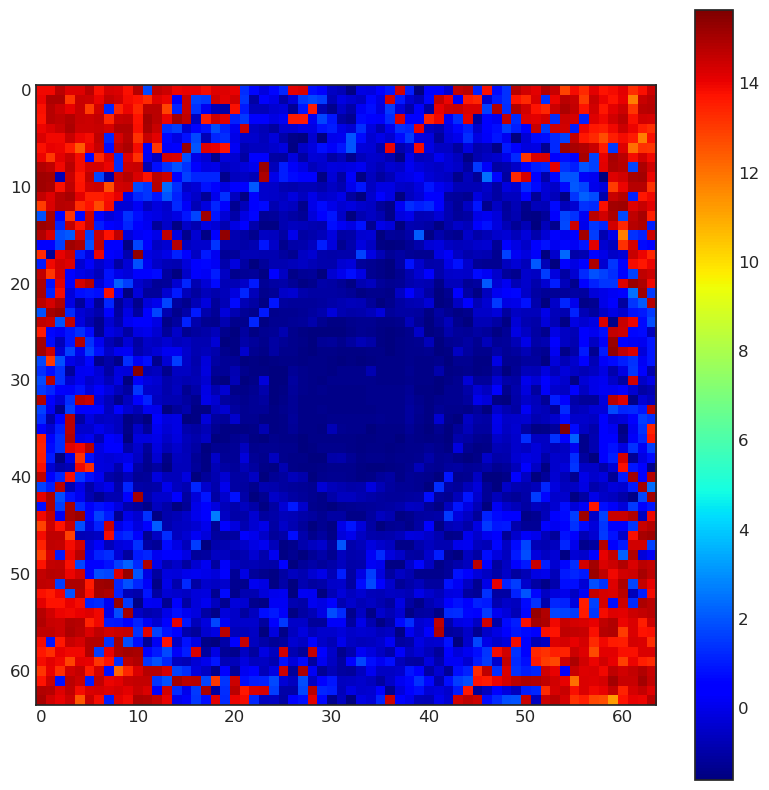

In [43]:
plt.imshow(np.log(.2 + np.abs((a[i, :, :, 0] - X_test[i, :, :, 0]) / (X_test[i, :, :, 0] + 1e-9))), cmap ='jet')
plt.colorbar()

In [45]:
# !ln ../xrd_clustering/notebooks/visualization.py
from ptycho import visualization as vis
reload(vis)

<module 'ptycho.visualization' from '/home/ollie/Documents/scratch/ptycho/notebooks/ptycho/visualization.py'>

diffraction reconstruction


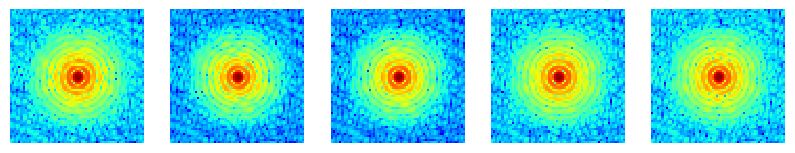

diffraction ground truth


/tmp/ipykernel_2102395/1178352548.py:10: RuntimeWarning: divide by zero encountered in log
  vis.display_imgs(np.log(np.absolute(X_test[:, :, :, 0]))[i:i + off])


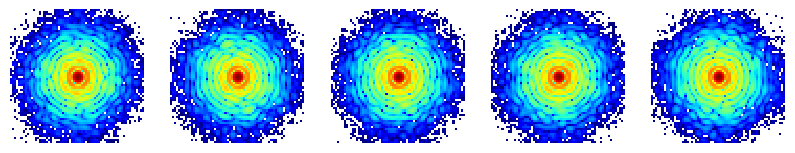

object reconstruction (amp)


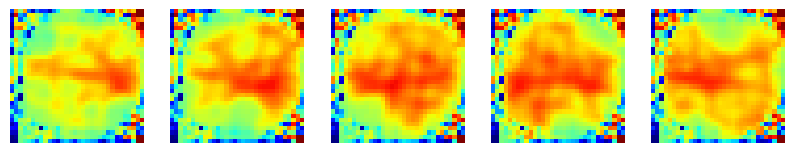

object ground truth


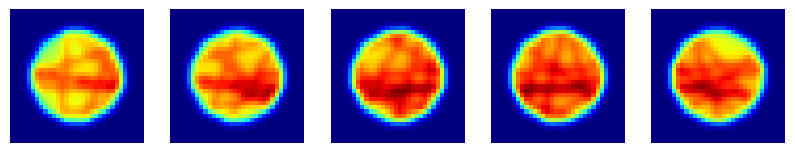

In [46]:
off = 5

vmin = np.min(Y_I_test[:, 16:-16, 16:-16][i:i + off])
vmax = np.max(Y_I_test[:, 16:-16, 16:-16][i:i + off])

print('diffraction reconstruction')
vis.display_imgs(np.log(np.absolute(a[:, :, :, 0]))[i:i + off])

print('diffraction ground truth')
vis.display_imgs(np.log(np.absolute(X_test[:, :, :, 0]))[i:i + off])

print('object reconstruction (amp)')
vis.display_imgs(np.absolute(b[:, 16:-16, 16:-16, 0])[i:i + off], vmin = vmin, vmax = vmax)
# print('object reconstruction (phase)')
# vis.display_imgs(np.angle(b[:, 16:-16, 16:-16, 0])[i:i + 10])#, vmin = vmin, vmax = vmax)
print('object ground truth')
vis.display_imgs(Y_I_test[:, 16:-16, 16:-16, 0][i:i + off], vmin = vmin, vmax = vmax)

In [47]:
# Evaluate resolution

# np.random.seed(2)
# Y_I_2, Y_phi_2, _Y_I_full_2, _ = datasets.simulate_objects(3, size)

# line = np.zeros_like(Y_I_2)
# line[:, 31, :, :] = .1
# line = f.gf(line, (0, 1, 1, 0))


# X_2, Y_I_2, Y_phi_2, _ =\
#     physics.illuminate_and_diffract(Y_I_2 + line, Y_phi_2, probe, intensity_scale = intensity_scale)

# plt.imshow((Y_I_2 - Y_I_test)[0, :, :, 0])
# plt.colorbar()

# b2 = model.diffraction_to_obj([X_2])
# difference = np.real(b2 - model.diffraction_to_obj([X_test])).mean(axis = 0)

# plt.imshow(difference, cmap = 'jet')

# lineout_orig = line[0, :, :, 0].sum(axis = 1)
# lineout_recon = difference[:, :, 0].sum(axis = 1)

## save model

In [48]:
history.history.keys()

dict_keys(['loss', 'trimmed_obj_loss', 'pred_diff_channels_loss', 'distribution_lambda_loss', 'trimmed_obj_1_loss', 'val_loss', 'val_trimmed_obj_loss', 'val_pred_diff_channels_loss', 'val_distribution_lambda_loss', 'val_trimmed_obj_1_loss', 'lr'])

In [50]:
# np.save(path+'str_history2', history.history)

In [251]:
# model.load_weights(checkpoint_filepath)

In [68]:
# autoencoder.save('{}.h5'.format(wt_path))